# WPROWADZENIE

**Źródło danych:** 
https://www.kaggle.com/maricinnamon/harry-potter-movies-dataset-starter-notebook/data

**Wykorzystane pliki z setu:** 
* Characters.csv - jest to zbiór wszystkich postaci występujących w serii filmów o Harrym Poterze.

**Dysponując takim zbiorem danych, chce sprawdzić:**
1. Ile postaci posiada to samo nazwisko? 
    * Które 5 nazwisk występuje najczęściej?
    * Ile nazwisk występuje tylko raz?
    * Czy to, że nie ma więcej osób o tym nazwisku oznacza, że były to drugoplanowe role? (potrzebny zbiór Dialogue.csv)
2. Czy w serii o HP występuje parytet? 
    * Ile procent postaci to kobiety?
    * Ile procent postaci to mężczyźni?
3. Ile procent postaci należy do:
    * Grifindor'u
    * Slytherin'u
    * Ravenclaw'u
    * Hufflepuff'u
4. Ile jest postaci o gatunku inny niż człowiek w serii o HP?
    * jaki procent innych gatunków stanowią poszczególne inne gatunki?
    * ile jest duchów?
    * czy każdy dom ma swojego ducha?
5. Ile postaci ma swojego patronusa?
    * czy któryś patronus się powtarza?


## PRZYGOTOWANIE IMPORTÓW I SPRAWDZENIE DANYCH:

In [1327]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Harry_Potter_Movies\Characters.csv')

In [1328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character ID    166 non-null    int64 
 1   Character Name  166 non-null    object
 2   Species         125 non-null    object
 3   Gender          125 non-null    object
 4   House           75 non-null     object
 5   Patronus        20 non-null     object
 6   Wand (Wood)     21 non-null     object
 7   Wand (Core)     18 non-null     object
dtypes: int64(1), object(7)
memory usage: 10.5+ KB


In [1329]:
df.sample(7)

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
91,92,Tom,Human,Male,NaN,NaN,NaN,NaN
97,98,Gellert Grindelwald,Human,Male,Durmstrang Institute,NaN,NaN,NaN
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
103,104,Bathilda Bagshot,Human,Female,NaN,NaN,NaN,NaN
116,117,Bloody Baron,Ghost,Male,Slytherin,NaN,NaN,NaN
59,60,Marge Dursley,Human,Female,NaN,NaN,NaN,NaN
138,139,Man,NaN,NaN,NaN,NaN,NaN,NaN


In [1330]:
df.isnull().sum()

Character ID        0
Character Name      0
Species            41
Gender             41
House              91
Patronus          146
Wand (Wood)       145
Wand (Core)       148
dtype: int64

## WNIOSKI PO WSTĘPNYM SPRAWDZENIU DANYCH:

* Zbiór posiada 166 postaci o unikalnym ID, dlatego ustawie na głównym DataFrame index właśnie na tę kolumnę
* Najwięcej informacji brakuje o rożdzkach i patronusach

In [1331]:
df.set_index('Character ID', inplace=True)
df.head(10)

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
Character ID,,,,,,,
1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
6,Severus Snape,Human,Male,Slytherin,Doe,NaN,NaN
7,Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring
8,Horace Slughorn,Human,Male,Slytherin,NaN,Cedar,Dragon Heartstring
9,Voldemort,Human,Male,Slytherin,NaN,Yew,Phoenix Feather


# ANALIZA

## Ile postaci posiada to samo nazwisko? 

Aby znaleźć odpowiedź na powyższe pytanie, należy najpierw wybrać z całego zbioru postacie z gatunku Człowiek i usunąć pozycję w których nie ma określonej płci. Z tego co sprawdziłam w takich wypadkach, są to postacie określane jako np. Studenci, Dziewczyny itp., więc dla tych rekordów i tak nie uda mi się wyodrębnić nazwisk.

In [1332]:
# wybranie tylko postaci z gatunku Człowiek:
only_human_name = {'Name_and_Surname': df['Character Name'], 'Species': df['Species']};
df__human_name = pd.DataFrame(only_human_name)
df__human_name[df__human_name['Species'].isin(['Human'])]
df__human_name.dropna(axis='index', inplace=True)
df__human_name.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 125
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name_and_Surname  125 non-null    object
 1   Species           125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


Otrzymałam listę 125 postaci, które na pewno są ludźmi.  
Kolumnę "Charakter Name" rozdzielę na dwie kolumny: "Name" i "Surname". Separatorem w tym wypadku będzie spacja. 

In [1333]:
# rozdzielanie imienia i nazwiska na dwie kolumny:

only_charakter_name = {'Name_and_Surname': df__human_name['Name_and_Surname']};
temp_list = pd.DataFrame(only_charakter_name)
split_list = pd.DataFrame(temp_list['Name_and_Surname'].str.split(" ", expand=True))
split_list.rename(columns={0: 'name', 1: 'surname'}, inplace=True)
split_list.info()

# inne rozwiązanie:
# df__human_name.drop('Species', axis=1, inplace=True)
# df__human_name.join(df__human_name.Name_and_Surname.str.extract('(?P<Name>\S+)\s+(?P<Surname>\S+)', expand=True))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 125
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     125 non-null    object
 1   surname  107 non-null    object
 2   2        4 non-null      object
dtypes: object(3)
memory usage: 3.9+ KB


Z listy 125 postaci gatunku Człowiek otrzymałam 107 nazwisk. Dodatkowo mam 4 rekordy, które miały jeszcze teskt po nazwisku. Sprawdzę co jest w tej kolumnie.

In [1334]:
split_list[2].unique()

array([None, 'Sr.', 'Nick', 'Slitherin', 'Jr.'], dtype=object)

Jak widać powyżej informacje w tej kolumnie są bezużyteczne, dlatego usuwam całą kolumnę.

In [1335]:
del split_list[2]
del split_list['name']
split_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 1 to 125
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surname  107 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


Skoro już mamy wyczyszczone dane, czas na właściwą zabawę z danymi.
Utworzę tabelę z samymi nazwiskami na której sprawdzę:
* jakie nazwiska są w top 5 najczęściej występujących nazwisk?

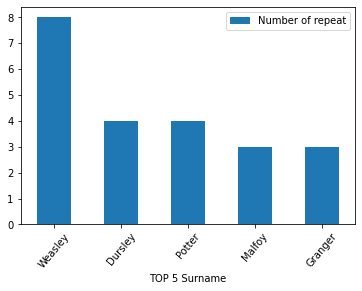

In [1336]:
surname = split_list['surname'].value_counts()
top_five = pd.DataFrame({'TOP 5 Surname': ['Weasley', 'Dursley', 'Potter', 'Malfoy', 'Granger'], 
                        'Number of repeat': [8, 4, 4, 3, 3]}, 
                        index=None)
plot = top_five.plot.bar(x='TOP 5 Surname', y='Number of repeat', rot=50)


* ile nazwisk występuje tylko raz?

In [1337]:
surname_df = split_list['surname'].value_counts().to_frame()
surname_df.rename(columns={'surname': 'counts of surname'}, inplace=True)
surname_df[surname_df['counts of surname'] == 1].sum()

counts of surname    73
dtype: int64

Z danych wynika, że 73 nazwiska ze 107 nazwisk postaci gatunku Człowiek występują tylko raz.
Sprawdzę ile to będzie procent.

In [1338]:
calculation_surname = {
    'Sum of all Human surname': surname_df['counts of surname'].sum(),
    'Sum of surname one counts': surname_df[surname_df['counts of surname'] == 1].sum()
}
calculation_surname
percent_surname = pd.DataFrame(calculation_surname, columns=['Sum of all Human surname', 'Sum of surname one counts'])
percent_surname['percent'] = ((percent_surname['Sum of surname one counts']/percent_surname['Sum of all Human surname'])*100)

percent_surname

,Sum of all Human surname,Sum of surname one counts,percent
counts of surname,107,73,68.224299


Powyżej widać, że postaci, których nazwiska się nie powtarzają u innych postaci, czyli defacto nie mają/ nie mieli/lub jest nieznana w filmie ich rodzina stanowią 68,22% wszystkich postaci.

## Ile postaci, których nazwisko się nie powtarza w zbiorze, ma dialogi w filmie?

Teraz chce sprawdzić czy z 73 postaci, których nazwiska się nie powtarzają w zbiorze postaci otrzymały w filmie swoje kwestie do wygłoszenia. Aby to zrobić potrzebuje jeszcze raz solidnie przygotować dane i złączyć je z tablą Dialogue. Obie tabele łączy kolumna "Character ID".

In [1339]:
# 1. Pobranie tabel:
df_characters = pd.read_csv('Harry_Potter_Movies\Characters.csv')
df_dialogue = pd.read_csv('Harry_Potter_Movies\Dialogue.csv')

### Przygotowanie danych z tabeli Characters.csv

In [1340]:
# Usuwanie zbędnych kolumn
df_characters.drop(['House', 'Patronus' ,'Wand (Wood)', 'Wand (Core)'], axis=1, inplace=True)

# Usuwanie pustych pozycji
df_characters.dropna(axis=0, how='any', inplace=True)

# Uporządkowanie kolumny gatunków
df_characters.loc[df_characters['Species'] != 'Human', 'Species'] = 'Other'

# Uporządkowanie kolumny płci
df_characters.loc[df_characters['Gender'] == 'Human', 'Gender'] = 'Male'

# Ustawienie kategorii
df_characters['Gender'] = df_characters['Gender'].astype('category')
df_characters['Species'] = df_characters['Species'].astype('category')

# Dodanie kolumn z samym nazwiskiem  
df_characters['Name'] = df_characters['Character Name'].str.split(' ', expand=True)[0]
df_characters['Surname'] = df_characters['Character Name'].str.split(' ', expand=True)[1]

# Usuwanie pustych pozycji w kolumnie Surname
df_characters.dropna(axis=0, how='any', inplace=True)

# Dodanie kolumny z Dialog ID
df_characters['Dialogue ID'] = 0

df_characters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 124
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Character ID    107 non-null    int64   
 1   Character Name  107 non-null    object  
 2   Species         107 non-null    category
 3   Gender          107 non-null    category
 4   Name            107 non-null    object  
 5   Surname         107 non-null    object  
 6   Dialogue ID     107 non-null    int64   
dtypes: category(2), int64(2), object(3)
memory usage: 5.5+ KB


### Przygotowanie danych z tabeli Dialogue.csv

In [1341]:
# Usuwanie niepotrzebnych kolumn
df_dialogue.drop(['Chapter ID', 'Place ID' ,'Dialogue'], axis=1, inplace=True)
df_dialogue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7444 entries, 0 to 7443
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Dialogue ID   7444 non-null   int64
 1   Character ID  7444 non-null   int64
dtypes: int64(2)
memory usage: 116.4 KB


### Łączenie tabel Characters i Dialogue

In [1342]:
# linked_table = pd.merge(df_characters, df_dialogue, on='Character ID', how='inner')
# linked_table.info()

## Czy w serii o HP występuje parytet?

Na początek sprawdzam jakie i w jakiej ilości występują wartości w kolumnie 'Gender' czyli płeć.

In [1343]:
df['Gender'].value_counts()

Male      82
Female    42
Human      1
Name: Gender, dtype: int64

Pojawia się niespodzianka w postaci płci "Human". Występuje tylko jeden raz więc może to być błąd. Sprawdzam to szukając w kolumnie 'Gender' łańcucha znaków 'Human'.

In [1344]:
df[df['Gender'].isin(['Human'])]

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
Character ID,,,,,,,
47,Nearly Headless Nick,Ghost,Human,Gryffindor,NaN,NaN,NaN


Na 46 pozycji pojawia się Prawiebezgłowy Nick, który jest duchem Gryffindoru. 
Ewidentnie wkradł się błąd, ponieważ ta postać powinna zostać sklasyfikowana jako mężczyzna. 
Naprawię to jedną linijką kodu.

In [1345]:
df['Gender'].replace('Human', 'Male', inplace=True)
df.iloc[46:47,:]

,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
Character ID,,,,,,,
47,Nearly Headless Nick,Ghost,Male,Gryffindor,NaN,NaN,NaN


In [1346]:
df['Gender'].value_counts()

Male      83
Female    42
Name: Gender, dtype: int64

Po zmianie widać, że w tabeli są tylko dwa rodzaje płci Kobieta (Female) i Mężczyzna (Male). Na pierwszy rzut oka widać, że kobiet jest dwa razy mniej niż mężczyzn. Co potwierdza poniższy wykres.

Text(0.5, 1.0, 'Płeć postaci w serii Harry Potter')

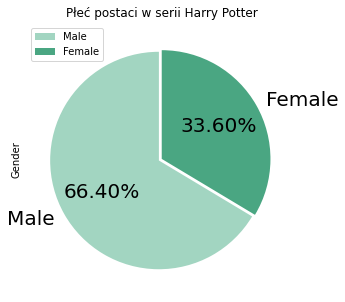

In [1347]:
gender = df['Gender'].value_counts();

plot = gender.plot.pie(
    figsize=(5,5), 
    legend=True, 
    fontsize=20,
    colors=['#a2d5c1', '#4aa682'],
    autopct = '%1.2f%%',
    explode=(0.030,0),
    startangle = 90,
    );
plt.title('Płeć postaci w serii Harry Potter')

## Ile procent postaci należy do konkretnego Domu?

Aby to sprawdzić potrzebuje tabeli, która będzie zawierać Character Name i House.

In [1348]:
df_house = df[['Character Name', 'House']].copy()
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 1 to 166
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Character Name  166 non-null    object
 1   House           75 non-null     object
dtypes: object(2)
memory usage: 3.9+ KB


Niestety informację o przynależności do domu mam tylko dla 75 postaci. Pozostałe muszę usunąć.

In [1349]:
df_house.dropna(inplace=True)

Sprawszę jakie mam informacje w kolumnie House.

In [1350]:
df_house['House'].unique()

array(['Gryffindor', 'Slytherin', 'Ravenclaw', 'Hufflepuff',
       'Beauxbatons Academy of Magic', 'Durmstrang Institute'],
      dtype=object)

Nie interesują mnie postaci z Beauxbatons Academy of Magic i Durmstrang Institute, więc je usunę a następnie ustale, że ta kolumna będzie klasyfikowana jako katergorie.

In [1351]:
# Usunięcie niepotrzebnych wierszy:
df_house.set_index('House', inplace=True)
df_house.drop('Durmstrang Institute', inplace=True)
df_house.drop('Beauxbatons Academy of Magic', inplace=True)
df_house.reset_index(inplace=True)
df_house['House'] = df_house['House'].astype('category')

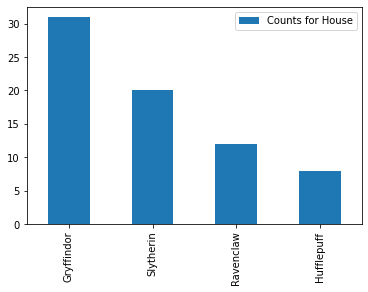

In [1352]:
plot_bar = df_house['House'].value_counts().to_frame().rename(columns={'House': 'Counts for House'}).plot.bar()



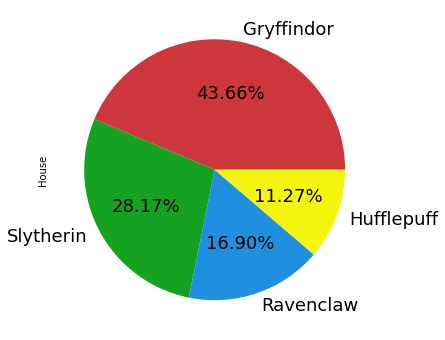

In [1353]:
plot_pie = df_house['House'].value_counts().plot.pie(
    figsize=(6,6),  
    fontsize=18,
    colors=['#cd373c', '#16a221', '#1f8fe0', '#f5f60e'],
    autopct = '%1.2f%%')

## Ile jest postaci o gatunku inny niż człowiek w serii o HP?